In [2]:
# imports
import math
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Initializing all the Support Vector Classifiers
clf=[
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto'))]

x=[[],[],[],[],[],[],[],[],[],[],[],[],[]]

# reading the speechcommands dataset x-y pair from files
fx=open('x.txt','rb')
fy=open('y.txt','rb')
while True:
    try:
        a=pickle.load(fx)
        for i in range(13):
            x[i].append(a[i].detach().numpy())
    except EOFError as e:
        break
y=pickle.load(fy)

# shuffling the x,y pairs of the dataset before doint the train-test split
x_=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
y_=[]
for i in np.random.permutation(len(y)):
    y_.append(y[int(i)])
    for j in range(13):
        x_[j].append(x[j][i])
x=x_
y=y_

In [4]:
# Train-Test split
split=0.2
split=math.floor(len(y)*split)
test_accuracy=[]
train_accuracy=[]

# training the SVC for all the attention layers representations

for i in range(len(clf)):
    clf[i].fit(np.array(x[i][:split]), np.array(y[:split]))
    # predicting class labels for train and test set
    train_y_pred=clf[i].predict(np.array(x[i][:split]))
    test_y_pred=clf[i].predict(np.array(x[i][split:]))
    train_accuracy.append(len(np.where((train_y_pred-np.array(y[:split]))==0)[0])/len(y[:split]))
    test_accuracy.append(len(np.where((test_y_pred-np.array(y[split:]))==0)[0])/len(y[split:]))

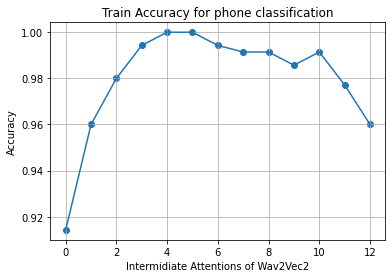

In [5]:
# plotting the train accuracy vs attention layers

plt.plot(range(len(train_accuracy)),train_accuracy)
plt.scatter(range(len(train_accuracy)),train_accuracy)
plt.xlabel('Intermidiate Attentions of Wav2Vec2')
plt.ylabel('Accuracy')
plt.title('Train Accuracy for phone classification')
plt.grid()
plt.savefig('phone_train.png')
plt.show()

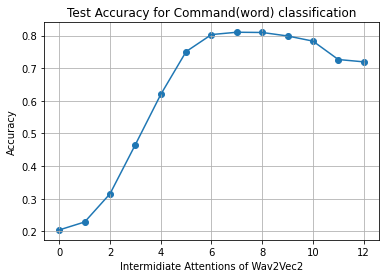

In [23]:
# plotting the test accuracy vs attention layers

plt.plot(range(len(test_accuracy)),test_accuracy)
plt.scatter(range(len(test_accuracy)),test_accuracy)
plt.xlabel('Intermidiate Attentions of Wav2Vec2')
plt.ylabel('Accuracy')
plt.title('Test Accuracy for Command(word) classification')
plt.grid()
plt.savefig('command_test.png')
plt.show()

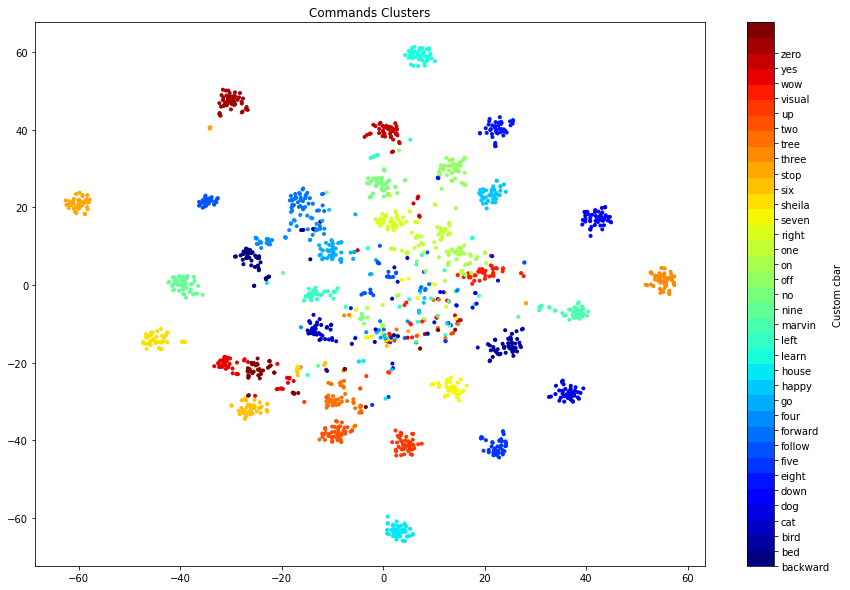

In [20]:
# imports
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA for initial dimensionality reduction 768->50
X=np.array(x[7])
pca=PCA(n_components=768)
pca.fit(X)
X=pca.transform(X)[:,:50]

# t-SNE for final dimensionality reduction to get the class seperated visualization of clusters 50->2
X_embedded=TSNE(n_components=2).fit_transform(X)

N=35

# Speech commands class labels
tags=['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']

# plotting the clusters for each class
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(1,1, figsize=(15,10))
scat=ax.scatter(X_embedded[:,0],X_embedded[:,1],marker='.',c=y,cmap=cmap,norm=norm)
cb=plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Commands Clusters')

loc=np.arange(0,max(y),max(y)/float(len(tags)))
cb.set_ticks(loc)
cb.set_ticklabels(tags)
plt.savefig('command_cluster.png')

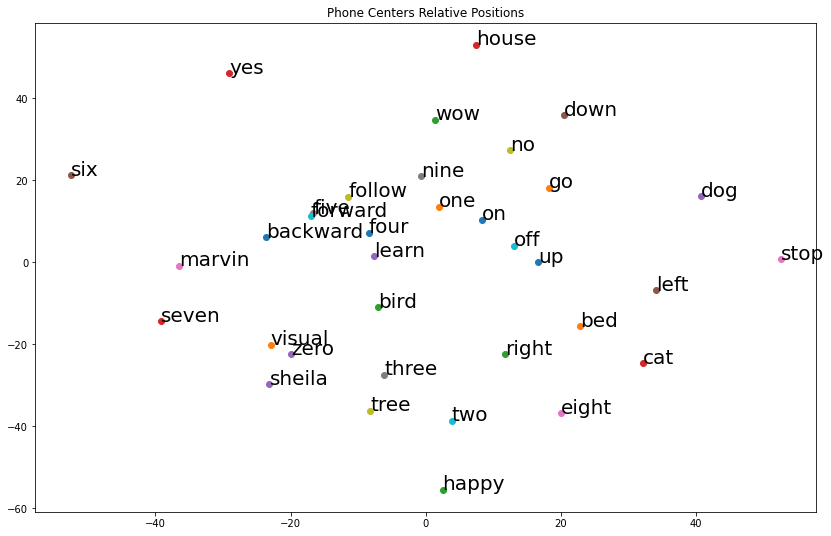

In [21]:
# plotting the centroids of the clusters with class labels
fig, ax=plt.subplots(1,1, figsize=(14,9))
for i,phone in enumerate(tags):
    center=np.mean(X_embedded[np.where(np.array(y)==i)[0],:],axis=0)
    plt.scatter([center[0]], [center[1]])
    plt.annotate(phone, (center[0], center[1]),fontsize=20)
ax.set_title('Phone Centoids Relative Positions')
plt.savefig('command_cluster_center.png')